<a href="https://colab.research.google.com/github/aivrm/ai/blob/main/EX_5_7_%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4_%EB%B6%84%EB%A5%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
## 5-7. 미니 프로젝트 : 가위바위보 분류기를 만들자

---

In [ ]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.8.2
1.21.6


---
아래의 사이트에서,  가위,바위,보 이미지를 각각 100개씩 캡쳐하여 zip화일로 받는다. (224x224 픽셀의 이미지임)

Teachable Machine

https://teachablemachine.withgoogle.com/

---


---
가위 는 scissor.zip

바위 는 rock.zip

보 는 paper.zip 로 이름을 바꾸고,

각각의 zip화일에는 이미지 100개씩 들어있도록 한다.  (224x224 픽셀의 이미지들임)

---

---
~/aiffel/aiffel/rock_scissor_paper 디렉토리에,

scissor, rock, paper 디렉토리를 만든다.

해당 디렉토리에 맞는 zip화일을 넣고,

unzip으로 압축을 푼다.

---

In [ ]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


---
위에서 획득한 이미지는 224x224 픽셀인데,

28x28 픽셀의 이미지로 리사이즈 한다.

---

In [ ]:
# 28x28 픽셀로 리사이즈
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size = (28, 28)

    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

In [ ]:
from os.path import join
DIR_img = '/content/drive/MyDrive/_aiffel/aiffel/rock_scissor_paper'

In [ ]:
# 가위 이미지가 저장된 scissor 디렉토리 아래의 모든 jpg 파일을 28x28 픽셀로
#image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
image_dir_path = join(DIR_img, 'scissor')
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [ ]:
# 바위 이미지가 저장된 rock 디렉토리 아래의 모든 jpg 파일을 28x28 픽셀로
#image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
image_dir_path = join(DIR_img, 'rock')
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [ ]:
# 보 이미지가 저장된 paper 디렉토리 아래의 모든 jpg 파일을 28x28 픽셀로
#image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
image_dir_path = join(DIR_img, 'paper')
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


---
scissor, rock, paper 디렉토리의 jpg 이미지들을, 편리하게 읽어들이는 함수

---

In [ ]:
# scissor, rock, paper 디렉토리의 jpg 이미지들을, 편리하게 읽어들이는 함수
def load_data(img_path, number_of_data=300):    # 가위바위보 이미지 갯수 총합 300장

    # 가위:0 | 바위:1 | 보:2
    img_size = 28
    color = 3

    # 이미지 데이터와 라벨(가위:0 | 바위:1 | 보:2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype = np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype = np.int32)

    idx = 0
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img    # 데이터 영역에 이미지 행력을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

---
정규화

---

In [ ]:
print(DIR_img)

/content/drive/MyDrive/_aiffel/aiffel/rock_scissor_paper


In [ ]:
#image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"

(x_train, y_train) = load_data(DIR_img)

# 정규화
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


---
샘플로 하나 확인

---

라벨:  0


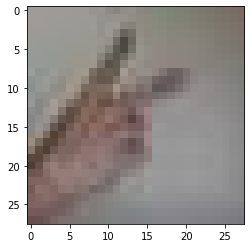

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

---
딥러닝 네트웍 설계

---

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# hyperpameters
n_channel_1 = 16
n_channel_2 = 64
n_dense = 128

n_train_epoch = 20

# tensorflow.keras 의 Sequential API
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3))) # 입력 이미지의 형태
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))    # 입력 이미지가 다양할수록 더 많은 특징을 보자.
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))    # 분류기 알고리즘을 얼마나 복잡하게 할 것인가? (복잡한 문제일수록 이 수를 증가시킬 것)
model.add(keras.layers.Dense(3, activation='softmax')) # 분류기의 최종 class 수 (여기서는 3개)

print('Model에 추가된 Layer 개수: ', len(model.layers))

# 모델 개요
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (No

---
딥러닝 네트웍 학습

---

In [ ]:
# Reshape
'''
print("Before Reshape - x_train_norm shape : {}".format(x_train_norm.shape))
x_train_reshaped = x_train_norm.reshape( -1, 28, 28, 3) # 데이터 갯수에 -1을 쓰면, reshape시 자동계산됩니다.
print("After Reshape - x_train_reshaped shape : {}".format(x_train_reshaped.shape))
'''

'\nprint("Before Reshape - x_train_norm shape : {}".format(x_train_norm.shape))\nx_train_reshaped = x_train_norm.reshape( -1, 28, 28, 3) # 데이터 갯수에 -1을 쓰면, reshape시 자동계산됩니다.\nprint("After Reshape - x_train_reshaped shape : {}".format(x_train_reshaped.shape))\n'

In [ ]:
# 학습
model.compile(optimizer='adam', # 아담
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/20
10/10 [==============================] - 10s 5ms/step - loss: 1.1039 - accuracy: 0.3933
Epoch 2/20
10/10 [==============================] - 0s 3ms/step - loss: 1.0473 - accuracy: 0.4867
Epoch 3/20
10/10 [==============================] - 0s 4ms/step - loss: 0.9217 - accuracy: 0.9233
Epoch 4/20
10/10 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.9600
Epoch 5/20
10/10 [==============================] - 0s 3ms/step - loss: 0.3979 - accuracy: 0.9733
Epoch 6/20
10/10 [==============================] - 0s 3ms/step - loss: 0.1756 - accuracy: 0.9900
Epoch 7/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0977 - accuracy: 0.9800
Epoch 8/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9867
Epoch 9/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9967
Epoch 10/20
10/10 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9967
Epoch 11/20
10/10 

---
테스트

---

테스트용 이미지 300개를 ~/aiffel/aiffel/rock_scissor_paper/test 디렉토리에 모두 넣어,

0 ~ 99 까지, 100 ~ 199까지, 200 ~ 299까지,  가위, 바위, 보 순서로 label을 설정했었으나,

파일명 순으로 가져오지 못하는 것을 발견하여,

test 디렉토리 밑에, scissor, rock, paper 각각 디렉토리를 만들어 가져오도록 함.



---
테스트용 데이터 28x28로 리사이즈

In [ ]:
# test 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 resize
#image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
'''
image_dir_path = join(DIR_img, 'test')
resize_images(image_dir_path)
print("test 이미지 resize 완료!")
'''
# 1개의 디렉토리에서 화일명 순서로 label을 식별 불가했음.

'\nimage_dir_path = join(DIR_img, \'test\')\nresize_images(image_dir_path)\nprint("test 이미지 resize 완료!")\n'

In [ ]:
from os.path import join
DIR_img = '/content/drive/MyDrive/_aiffel/aiffel/rock_scissor_paper'

# TEST용 데이터 리사이즈
image_dir_path = join(DIR_img, 'test/scissor')
resize_images(image_dir_path)
print("Test용 가위 이미지 resize 완료!")

image_dir_path = join(DIR_img, 'test/rock')
resize_images(image_dir_path)
print("Test용 바위 이미지 resize 완료!")

image_dir_path = join(DIR_img, 'test/paper')
resize_images(image_dir_path)
print("Test용 보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
Test용 가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
Test용 바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
Test용 보 이미지 resize 완료!


---
테스트용 데이터 로딩

In [ ]:
# 테스트 데이터용 load 함수
'''
def load_test_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사

        if(idx <= 100):
            labels[idx]=0   # 가위 : 0
        if(idx > 100 and idx <= 200):
            labels[idx]=1   # 바위 : 1
        if(idx > 200 and idx <= 300):
            labels[idx]=2   # 보 : 2

        idx=idx+1
        
    print("테스트 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels
'''

'\ndef load_test_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.\n    # 가위 : 0, 바위 : 1, 보 : 2\n    img_size=28\n    color=3\n    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.\n    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)\n    labels=np.zeros(number_of_data,dtype=np.int32)\n\n    idx=0\n    for file in glob.iglob(img_path+\'/test/*.jpg\'):\n        img = np.array(Image.open(file),dtype=np.int32)\n        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사\n\n        if(idx <= 100):\n            labels[idx]=0   # 가위 : 0\n        if(idx > 100 and idx <= 200):\n            labels[idx]=1   # 바위 : 1\n        if(idx > 200 and idx <= 300):\n            labels[idx]=2   # 보 : 2\n\n        idx=idx+1\n        \n    print("테스트 데이터(x_test)의 이미지 개수는", idx,"입니다.")\n    return imgs, labels\n'

In [ ]:
# 테스트 데이터용 load 함수
# scissor, rock, paper 디렉토리의 jpg 이미지들을, 편리하게 읽어들이는 함수
def load_test_data(img_path, number_of_data=300):    # 가위바위보 이미지 갯수 총합 300장

    # 가위:0 | 바위:1 | 보:2
    img_size = 28
    color = 3

    # 이미지 데이터와 라벨(가위:0 | 바위:1 | 보:2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype = np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype = np.int32)

    idx = 0
    for file in glob.iglob(img_path + '/test/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx, :, :, :] = img    # 데이터 영역에 이미지 행력을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path + '/test/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path + '/test/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

In [ ]:
# 테스트용 데이터 load
#image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test) = load_test_data(DIR_img)

학습데이터(x_train)의 이미지 개수는 300 입니다.


In [ ]:
# 테스트용 데이터 정규화
x_test_norm = x_test / 255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [ ]:
# 테스트용 데이터 Reshape
'''
print("Before Reshape - x_test_norm shape  : {}".format(x_test_norm.shape))
x_test_reshaped  = x_test_norm.reshape ( -1, 28, 28, 3)
print("After Reshape - x_test_reshaped shape  : {}".format(x_test_reshaped.shape))
'''

'\nprint("Before Reshape - x_test_norm shape  : {}".format(x_test_norm.shape))\nx_test_reshaped  = x_test_norm.reshape ( -1, 28, 28, 3)\nprint("After Reshape - x_test_reshaped shape  : {}".format(x_test_reshaped.shape))\n'

In [ ]:
# model.evaluate
#test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss    : {}".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 9.3071 - accuracy: 0.3333 - 145ms/epoch - 14ms/step
test_loss    : 9.307053565979004
test_accuracy: 0.3333333432674408


---
# 회고

---

이번 노드에서 느낀 점은,


훈련용 데이터를 대상으로 하는 accuracy 에서는,

훈련용 데이터 내에서 맞고 틀린 것만으로 따지기 때문에,

Hyperparameters를 조정하여, accuracy를 아무리 100%에 가깝게 만들어도.......


새로운 테스트 데이터에서는 무용지물이 될 수 있다는 사실을 확실히 체감하게 되었습니다.

또한, 훈련량을 늘리면 훈련용 데이터에서의 accuracy는 소폭이라도 증가하게 되지만,

테스트 데이터에서도 accuracy가 증가하는 것이 아니라,

오히려 감소할 수도 있음을 확인할 수 있었습니다.

학습용 데이터의 중요성에 대하여서도 생각해 보는 기회가 되었습니다.

다양한 환경을 고려한 충분한 학습용 데이터가 필요하며,

학습용 데이터에서 특징을 추출할 수 있어야만,

테스트 데이터에서 해당 특징으로 식별이 용이하지 않을까 생각해 보았습니다.

단일 조건에서의 데이터로 학습했을 경우,

별개의 다양한 환경의 테스트 데이터가 들어왔을 경우, 이를 식별할 수 있을까 생각해 보았습니다.

Tensorflow 에서 Keras 라는 것을 가져와서,

Sequential 모델을 사용하는 것을 보게 되었습니다.

Sequential 모델에 단지 add 하면서 layer를 추가하는 모습을 보며,

이렇게 간단하게 몇 줄로 레이어가 추가되는 것이 신기하게 느껴졌습니다.

다만, 아직도 어떠한 레이어들이 있고, 어떤 기능을 하는지 정확히 알지 못하며,

궁극적으로는 높은 추상화를 이룰 수 있어야만,

다양한 환경과 노이즈에서도 대상을 정확히 식별할 수 있지 않을까,

어렴풋이 생각해 보는 시간이 되었습니다.